In [1]:
# German Credit Score Model : Determining the most efficient model to predict whether customers
# of a particular bank are creditable or not. Training and test sets are in TrainingData.csv and TestData.csv respectively.
# Data is preprocessed to include the most relevant input features.
# Logistic Regression, Decision Tree, Random Forest and Gradient Boosted Classifiers are used for evaluation. 
# Area under the ROC curve is chosen as the metric to select the best model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
sns.set_style('white')

In [3]:
# Load the training and test sets
a = list(np.arange(1,22))
credit_training = pd.read_csv(r'C:\Users\ordinateur\Downloads\TrainingData.csv', usecols = a)
credit_test = pd.read_csv(r'C:\Users\ordinateur\Downloads\TestData.csv',sep=';')

##  Exploratory Analysis and Data Preprocessing

In [4]:
# List of Variables #
print(' Columns : ', credit_training.columns)
print('\n')

 Columns :  Index(['Creditability', 'Account.Balance', 'Duration.of.Credit..month.',
       'Payment.Status.of.Previous.Credit', 'Purpose', 'Credit.Amount',
       'Value.Savings.Stocks', 'Length.of.current.employment',
       'Instalment.per.cent', 'Sex...Marital.Status', 'Guarantors',
       'Duration.in.Current.address', 'Most.valuable.available.asset',
       'Age..years.', 'Concurrent.Credits', 'Type.of.apartment',
       'No.of.Credits.at.this.Bank', 'Occupation', 'No.of.dependents',
       'Telephone', 'Foreign.Worker'],
      dtype='object')




In [5]:
# Target values : Creditable - 1 (70 %), Non-Creditable - 0 (30 %)
print(credit_training['Creditability'].value_counts())
print('\n')

1    343
0    157
Name: Creditability, dtype: int64




In [6]:
# Account Balance 
print(credit_training['Account.Balance'].value_counts())

3    218
1    158
2    124
Name: Account.Balance, dtype: int64


In [7]:
# Contingency Table 
tab = pd.crosstab(credit_training['Account.Balance'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Squrare Value, P-Value', chi2, p)

Creditability     0    1
Account.Balance         
1                81   77
2                49   75
3                27  191
Chi-Squrare Value, P-Value 69.331379077224 8.808101731863181e-16


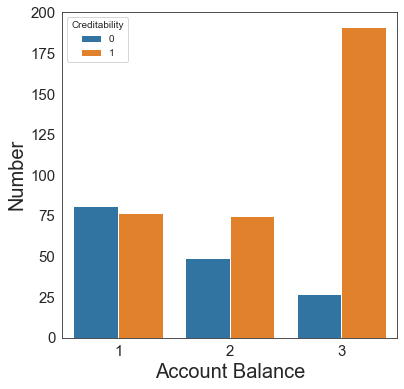

In [8]:
# Barplot of Account Balance categories 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Account.Balance'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Account Balance',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

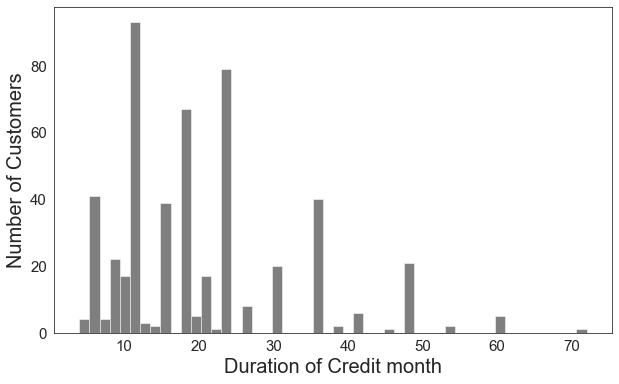

In [9]:
# Histogram of Duration of Credit - months
plt.figure(figsize = (10,6))
credit_training['Duration.of.Credit..month.'].plot.hist(color = 'k', bins = 50, alpha = 0.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Duration of Credit month', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
print('\n')

In [10]:
# Payment Status of Previous Credit
print(credit_training['Payment.Status.of.Previous.Credit'].value_counts())

2    272
3    176
1     52
Name: Payment.Status.of.Previous.Credit, dtype: int64


In [11]:
# Contingency Table 
tab = pd.crosstab(credit_training['Payment.Status.of.Previous.Credit'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability                       0    1
Payment.Status.of.Previous.Credit         
1                                  28   24
2                                  92  180
3                                  37  139
Chi-Square Value, P-Value 21.703307397521392 1.93725450323509e-05


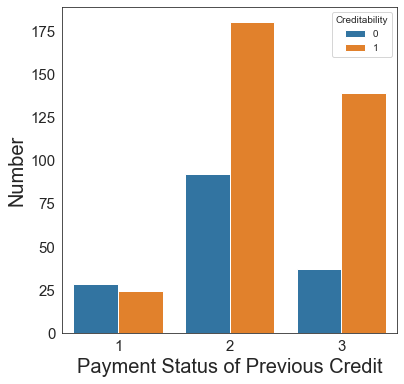

In [12]:
# Barplot of Payment Status of Previous Credit 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Payment.Status.of.Previous.Credit'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Payment Status of Previous Credit',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [13]:
# Purpose categorical values : before mapping
print(credit_training['Purpose'].value_counts())

3    185
4    169
2     94
1     52
Name: Purpose, dtype: int64


In [14]:
# Purpose categorical values : 1 & 2 mapped to 1, 3 to 2, 4 to 3
credit_training['Purpose'] = credit_training['Purpose'].map({1:1, 2:1, 3:2, 4:3})
print(credit_training['Purpose'].value_counts())

2    185
3    169
1    146
Name: Purpose, dtype: int64


In [15]:
# Contingency Table 
tab = pd.crosstab(credit_training['Purpose'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability   0    1
Purpose               
1              45  101
2              52  133
3              60  109
Chi-Square Value, P-Value 2.2741192264017402 0.32076079735981183


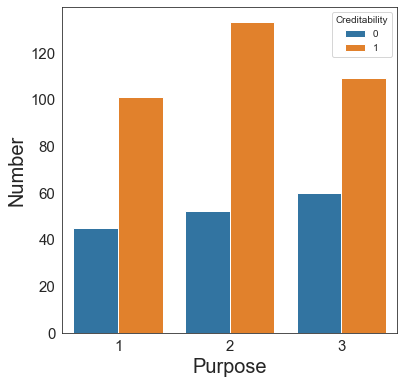

In [16]:
# Barplot of Purpose categories 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Purpose'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Purpose',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

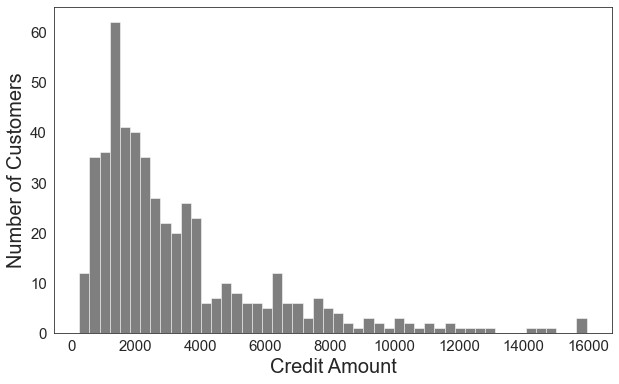

In [17]:
# Histogram of Credit Amount
plt.figure(figsize = (10,6))
credit_training['Credit.Amount'].plot.hist(color = 'k', bins = 50, alpha = 0.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Credit Amount', fontsize =20)
plt.ylabel('Number of Customers', fontsize =20)
print('\n')

In [18]:
# Value of Savings Stocks categorical values : before mapping; Too few obs. in 3 and 4
print(credit_training['Value.Savings.Stocks'].value_counts())

1    300
4     92
2     55
3     53
Name: Value.Savings.Stocks, dtype: int64


In [19]:
# Value of Savings Stocks categorical values : 2, 3, 4 mapped to 2
credit_training['Value.Savings.Stocks'] = credit_training['Value.Savings.Stocks'].map({1:1, 2:2, 3:2, 4:2})
print(credit_training['Value.Savings.Stocks'].value_counts())


1    300
2    200
Name: Value.Savings.Stocks, dtype: int64


In [20]:
# Contingency Table 
tab = pd.crosstab(credit_training['Value.Savings.Stocks'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability           0    1
Value.Savings.Stocks          
1                     113  187
2                      44  156
Chi-Square Value, P-Value 12.955887541549833 0.0003189169609094265


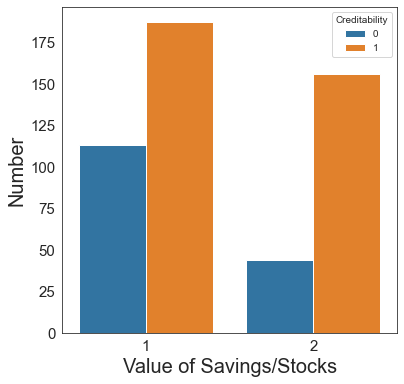

In [21]:
# Barplot of Savings Stocks Value categories 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Value.Savings.Stocks'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Value of Savings/Stocks',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [22]:
# Length of Current employment values ( yearly )
print(credit_training['Length.of.current.employment'].value_counts())

2    170
4    131
1    121
3     78
Name: Length.of.current.employment, dtype: int64


In [23]:
# Contingency Table 
tab = pd.crosstab(credit_training['Length.of.current.employment'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability                  0    1
Length.of.current.employment         
1                             52   69
2                             52  118
3                             18   60
4                             35   96
Chi-Square Value, P-Value 11.420312449962852 0.009657241437057682


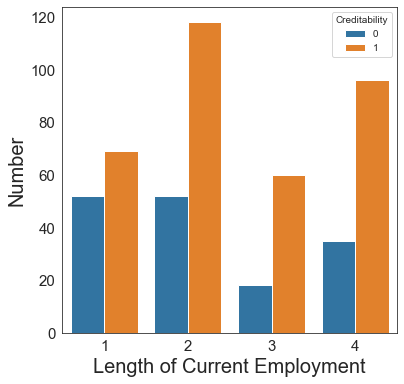

In [24]:
# Barplot of Current employment values ( yearly ) 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Length.of.current.employment'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Length of Current Employment',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [25]:
# Instalment per cent categorical values 
print(credit_training['Instalment.per.cent'].value_counts())

4    233
2    118
3     80
1     69
Name: Instalment.per.cent, dtype: int64


In [26]:
# Contingency Table 
tab = pd.crosstab(credit_training['Instalment.per.cent'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability         0    1
Instalment.per.cent         
1                    16   53
2                    33   85
3                    27   53
4                    81  152
Chi-Square Value, P-Value 4.235096702568512 0.23717144627249723


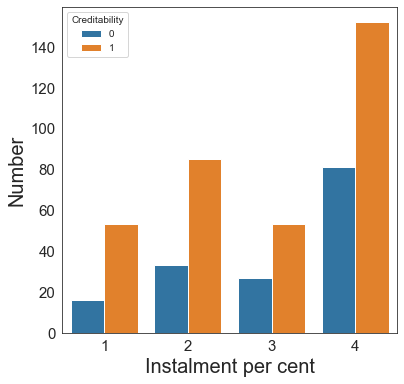

In [27]:
# Barplot of instalment per cent 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Instalment.per.cent'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Instalment per cent',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [28]:
# Sex - Marital Status values
print(credit_training['Sex...Marital.Status'].value_counts())

2    275
1    183
3     42
Name: Sex...Marital.Status, dtype: int64


In [29]:
# Contingency Table 
tab = pd.crosstab(credit_training['Sex...Marital.Status'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability          0    1
Sex...Marital.Status         
1                     71  112
2                     74  201
3                     12   30
Chi-Square Value, P-Value 7.380303006120566 0.02496821899412428


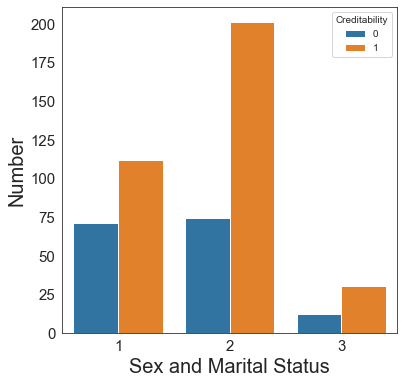

In [30]:
# Barplot of Sex and Marital Status 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Sex...Marital.Status'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Sex and Marital Status',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [31]:
# Guarantors
print(credit_training['Guarantors'].value_counts())

1    451
2     49
Name: Guarantors, dtype: int64


In [32]:
# Contingency Table 
tab = pd.crosstab(credit_training['Guarantors'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability    0    1
Guarantors             
1              145  306
2               12   37
Chi-Square Value, P-Value 0.8748553906095007 0.34961462897395024


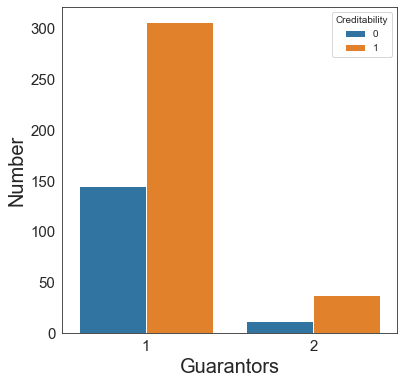

In [33]:
# Barplot of Guarantors 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Guarantors'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Guarantors',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [34]:
# Duration in Current Address values
print(credit_training['Duration.in.Current.address'].value_counts())

4    211
2    152
3     72
1     65
Name: Duration.in.Current.address, dtype: int64


In [35]:
# Contingency Table 
tab = pd.crosstab(credit_training['Duration.in.Current.address'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability                 0    1
Duration.in.Current.address         
1                            22   43
2                            51  101
3                            16   56
4                            68  143
Chi-Square Value, P-Value 3.3901109083421 0.3352965098251833


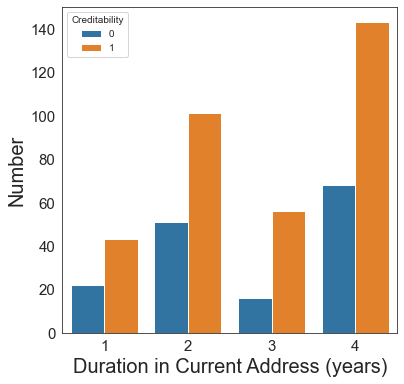

In [36]:
# Barplot of Duration in Address values 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Duration.in.Current.address'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Duration in Current Address (years)',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
plt.show()
print('\n')

In [37]:
# Concurrent credits categorical values
print(credit_training['Concurrent.Credits'].value_counts())

2    396
1    104
Name: Concurrent.Credits, dtype: int64


In [38]:
# Contingency Table 
tab = pd.crosstab(credit_training['Concurrent.Credits'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability         0    1
Concurrent.Credits          
1                    40   64
2                   117  279
Chi-Square Value, P-Value 2.6400230400620353 0.10420203272426698


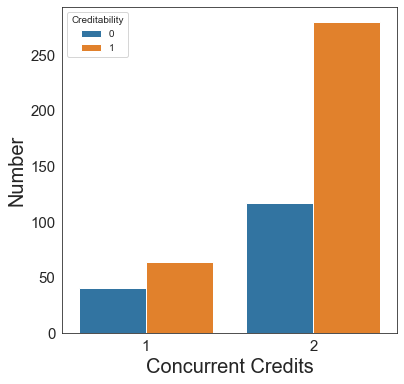

In [39]:
# Barplot of Concurrent credits 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Concurrent.Credits'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Concurrent Credits',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [40]:
# Most valuable available asset categorical values
print(credit_training['Most.valuable.available.asset'].value_counts())

3    151
1    138
2    133
4     78
Name: Most.valuable.available.asset, dtype: int64


In [41]:
# Contingency Table 
tab = pd.crosstab(credit_training['Most.valuable.available.asset'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability                   0    1
Most.valuable.available.asset         
1                              29  109
2                              43   90
3                              51  100
4                              34   44
Chi-Square Value, P-Value 12.739489150968396 0.005235222011551068


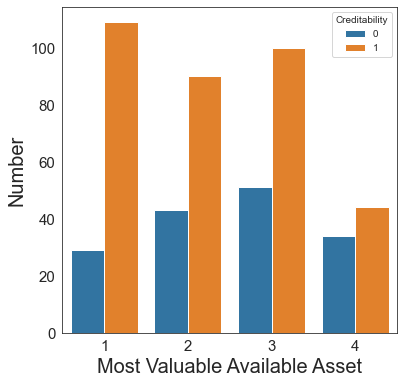

In [42]:
# Barplot of asset 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Most.valuable.available.asset'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Most Valuable Available Asset',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

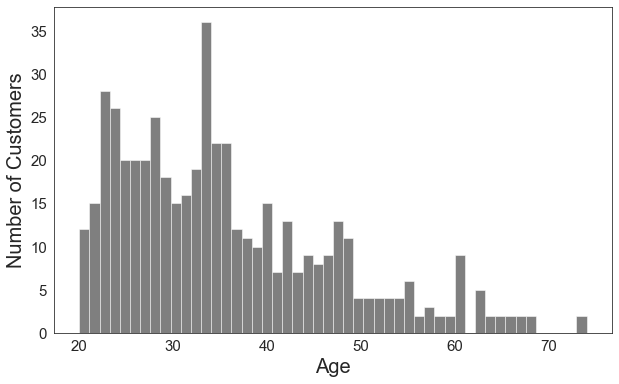

In [43]:
# Histogram of Age of customers
plt.figure(figsize = (10,6))
credit_training['Age..years.'].plot.hist(color = 'k', bins = 50, alpha = 0.5)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
print('\n')

In [44]:
# Apartment categorical values
print(credit_training['Type.of.apartment'].value_counts())

2    359
1     89
3     52
Name: Type.of.apartment, dtype: int64


In [45]:
# Contingency Table 
tab = pd.crosstab(credit_training['Type.of.apartment'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability       0    1
Type.of.apartment         
1                  39   50
2                  95  264
3                  23   29
Chi-Square Value, P-Value 14.411247374900535 0.0007423990267454307


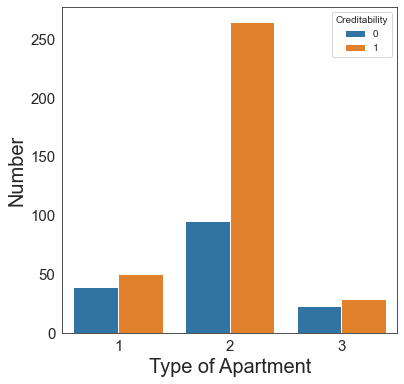

In [46]:
# Barplot of type of apartment categories 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Type.of.apartment'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Type of Apartment',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [47]:
# Credits at the Bank (categorical values)
print(credit_training['No.of.Credits.at.this.Bank'].value_counts())

1    313
2    187
Name: No.of.Credits.at.this.Bank, dtype: int64


In [48]:
# Contingency Table 
tab = pd.crosstab(credit_training['No.of.Credits.at.this.Bank'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability                 0    1
No.of.Credits.at.this.Bank          
1                           103  210
2                            54  133
Chi-Square Value, P-Value 0.705575427033168 0.40091658768930927


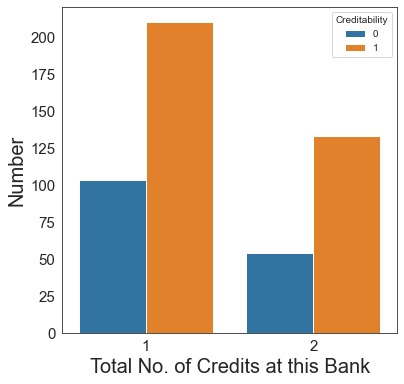

In [49]:
# Barplot of Total Credits 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['No.of.Credits.at.this.Bank'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Total No. of Credits at this Bank',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [50]:
# Occupation categories : Drop this feature since there is only one category
print(credit_training['Occupation'].value_counts())
credit_training = credit_training.drop('Occupation', axis = 1)
credit_test = credit_test.drop('Occupation', axis = 1)
print('\n')

1    500
Name: Occupation, dtype: int64




In [51]:
# Dependent feature values
print(credit_training['No.of.dependents'].value_counts())

1    417
2     83
Name: No.of.dependents, dtype: int64


In [52]:
# Contingency Table 
tab = pd.crosstab(credit_training['No.of.dependents'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability       0    1
No.of.dependents          
1                 134  283
2                  23   60
Chi-Square Value, P-Value 0.4402104460680889 0.5070208994994749


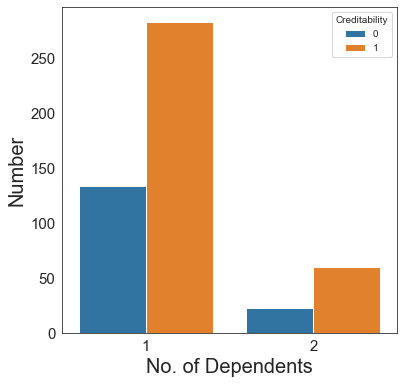

In [53]:
# Barplot of Dependents 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['No.of.dependents'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('No. of Dependents',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [54]:
# Telephone feature values 
print(credit_training['Telephone'].value_counts())

1    295
2    205
Name: Telephone, dtype: int64


In [55]:
# Contingency Table 
tab = pd.crosstab(credit_training['Telephone'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability    0    1
Telephone              
1              103  192
2               54  151
Chi-Square Value, P-Value 3.7391653353926575 0.0531509894434575


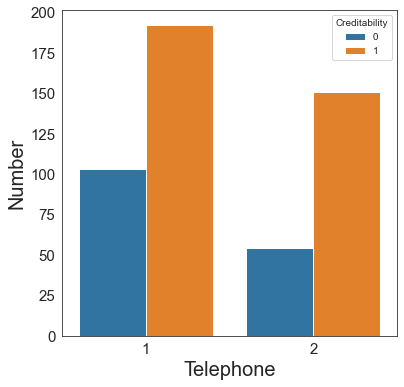

In [56]:
# Barplot of Telephone feature values 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Telephone'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Telephone',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [57]:
# Foreign Worker feature values 
print(credit_training['Foreign.Worker'].value_counts())

1    480
2     20
Name: Foreign.Worker, dtype: int64


In [58]:
# Contingency Table 
tab = pd.crosstab(credit_training['Foreign.Worker'], credit_training['Creditability'])
print(tab)
chi2, p, dof, exp = chi2_contingency(tab)
print('Chi-Square Value, P-Value', chi2, p)

Creditability     0    1
Foreign.Worker          
1               157  323
2                 0   20
Chi-Square Value, P-Value 8.077941140059298 0.004480732400325024


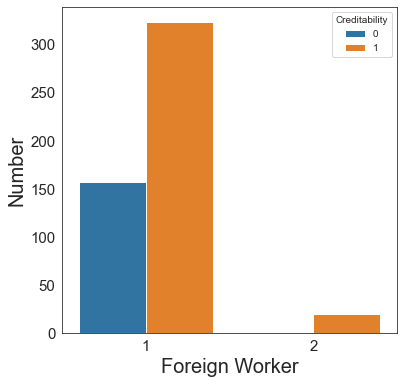

In [59]:
# Barplot of Foregin Worker feature values 
fig = plt.figure(figsize = (6,6))
stacked = tab.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x = stacked['Foreign.Worker'], y = stacked.value, hue = stacked['Creditability'])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Foreign Worker',fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.show()
print('\n')

In [60]:
# Summary of statistics for continuous variables:
print(credit_training['Age..years.'].describe())
print(credit_training['Duration.of.Credit..month.'].describe())
print(credit_training['Credit.Amount'].describe())
print('\n')

count    500.000000
mean      35.626000
std       11.296608
min       20.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       74.000000
Name: Age..years., dtype: float64
count    500.000000
mean      20.254000
std       11.766664
min        4.000000
25%       12.000000
50%       18.000000
75%       24.000000
max       72.000000
Name: Duration.of.Credit..month., dtype: float64
count      500.000000
mean      3300.400000
std       2806.153898
min        250.000000
25%       1381.750000
50%       2370.500000
75%       3967.500000
max      15945.000000
Name: Credit.Amount, dtype: float64




<ipython-input-61-a4301386a614>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)


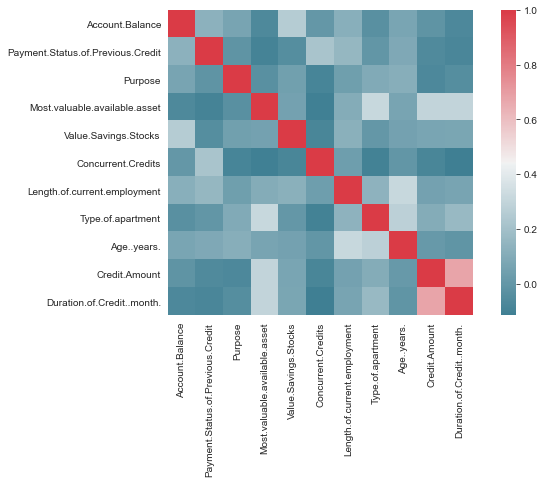

In [61]:
# Plotting the Correlation Matrix : Ignore Duration of Credit Month henceforth

data = credit_training[['Account.Balance','Payment.Status.of.Previous.Credit','Purpose','Most.valuable.available.asset','Value.Savings.Stocks','Concurrent.Credits','Length.of.current.employment','Type.of.apartment','Age..years.','Credit.Amount','Duration.of.Credit..month.']]

fig, ax = plt.subplots(figsize = (10,8))
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)
plt.gcf().subplots_adjust(bottom=0.35)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Machine Learning Algorithms

In [62]:
# Scaling the data
scaler = MinMaxScaler()

X_train = credit_training[['Account.Balance','Payment.Status.of.Previous.Credit','Purpose','Most.valuable.available.asset','Value.Savings.Stocks','Concurrent.Credits','Length.of.current.employment','Type.of.apartment','Age..years.','Credit.Amount']]
y_train = credit_training.loc[:, 'Creditability']

X_test = credit_test[['Account Balance','Payment Status of Previous Credit','Purpose','Most valuable available asset','Value Savings/Stocks','Concurrent Credits','Length of current employment','Type of apartment','Age (years)','Credit Amount']]
y_test = credit_test.loc[:,'Creditability']

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
### Dummy Classifier invoke to test for accuracy ###

print('Dummy Classifier evaluation')
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train_scaled, y_train)
y_dummy_majorty = dummy_majority.predict(X_test_scaled)
print('Acccuracy of Dummy classifier on test set {:.3f}\n'.format(dummy_majority.score(X_test_scaled, y_test)))

Dummy Classifier evaluation
Acccuracy of Dummy classifier on test set 0.700



Regulatization parameter 0.10
Acccuracy of Logistic Regression classifier on training set 0.724
Accuracy of Logistic Regression classifier on test set 0.729
Precision 0.7354555433589463
Recall 0.9571428571428572
F1-score 0.8317815021725636


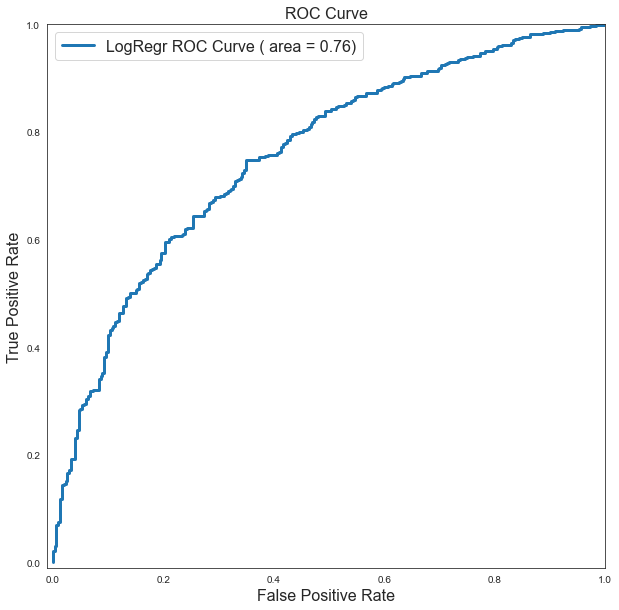

Regulatization parameter 1.00
Acccuracy of Logistic Regression classifier on training set 0.746
Accuracy of Logistic Regression classifier on test set 0.732
Precision 0.7559241706161137
Recall 0.9114285714285715
F1-score 0.8264248704663213


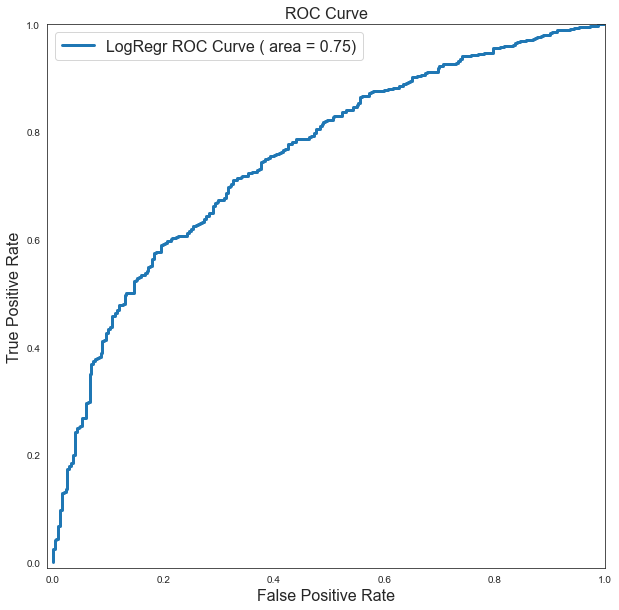

Regulatization parameter 100.00
Acccuracy of Logistic Regression classifier on training set 0.752
Accuracy of Logistic Regression classifier on test set 0.736
Precision 0.7652068126520681
Recall 0.8985714285714286
F1-score 0.8265440210249672


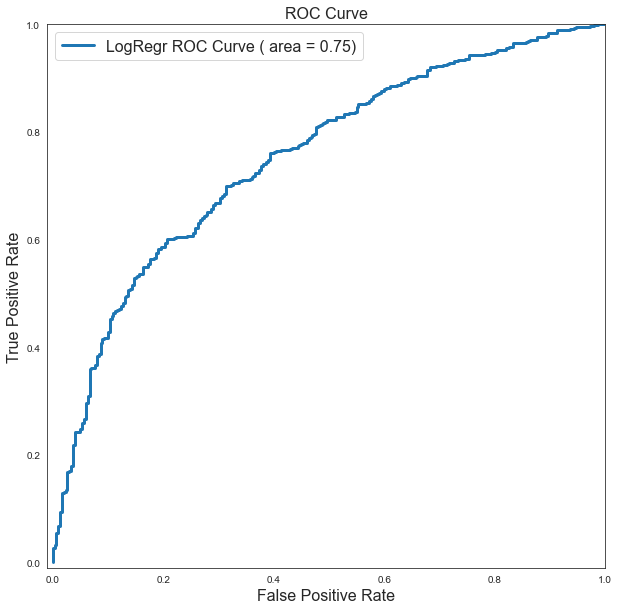

In [64]:
### Logistic Regression Classifier ### 
for this_C in [0.1,1,100]:
    
    print('Regulatization parameter {:.2f}'.format(this_C))
    
    clf = LogisticRegression(C = this_C).fit(X_train_scaled, y_train)
    y_predict = clf.predict(X_test_scaled)
    y_score_clf = clf.decision_function(X_test_scaled)

    print('Acccuracy of Logistic Regression classifier on training set', clf.score(X_train_scaled, y_train))
    print('Accuracy of Logistic Regression classifier on test set', clf.score(X_test_scaled, y_test))
    print('Precision', precision_score(y_test, y_predict))
    print('Recall', recall_score(y_test, y_predict))
    print('F1-score', f1_score(y_test, y_predict))
    
    fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
    roc_auc_clf = auc(fpr_clf, tpr_clf)
    
    plt.figure(figsize = (10,10))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.00])
    plt.plot(fpr_clf, tpr_clf, lw = 3, label = 'LogRegr ROC Curve ( area = {:.2f})'.format(roc_auc_clf))
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.title('ROC Curve', fontsize = 16)
    plt.legend(fontsize = 16)
    plt.show()

Grid Search best parameter : {'max_depth': 5, 'min_samples_split': 20}


Acccuracy of Decision Tree classifier on training set 0.772
Accuracy of Decision Tree classifier on test set 0.744
Precision 0.7505643340857788
Recall 0.95
F1-score 0.8385876418663304


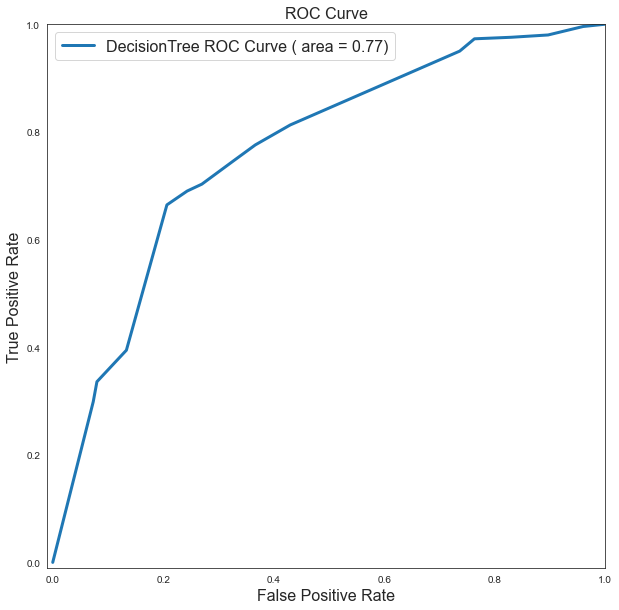

In [65]:
### Decision Tree Classifier ###

clf = DecisionTreeClassifier(random_state = 0).fit(X_train_scaled, y_train)

grid_values = {'max_depth' : [2, 3, 4, 5], 'min_samples_split' : [5, 10, 15, 20]}
grid_clf = GridSearchCV(clf, param_grid = grid_values, cv = 5, scoring = 'precision')
grid_clf.fit(X_train_scaled, y_train)
print('Grid Search best parameter : {0}'.format(grid_clf.best_params_))
    
clf = DecisionTreeClassifier(max_depth = grid_clf.best_params_['max_depth'], min_samples_split = grid_clf.best_params_['min_samples_split'], random_state = 0).fit(X_train_scaled, y_train)

y_predict = clf.predict(X_test_scaled)
y_score_clf = clf.predict_proba(X_test_scaled)[:,1]

print('\n')
print('Acccuracy of Decision Tree classifier on training set', clf.score(X_train_scaled, y_train))
print('Accuracy of Decision Tree classifier on test set', clf.score(X_test_scaled, y_test))
print('Precision', precision_score(y_test, y_predict))
print('Recall', recall_score(y_test, y_predict))
print('F1-score', f1_score(y_test, y_predict))

fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)
    
plt.figure(figsize = (10,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr_clf, tpr_clf, lw = 3, label = 'DecisionTree ROC Curve ( area = {:.2f})'.format(roc_auc_clf))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC Curve', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()


Grid Search best parameter : {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 30}


Acccuracy of Random Forest classifier on training set 0.826
Accuracy of Random Forest classifier on test set 0.771
Precision 0.7697594501718213
Recall 0.96
F1-score 0.8544183089637636


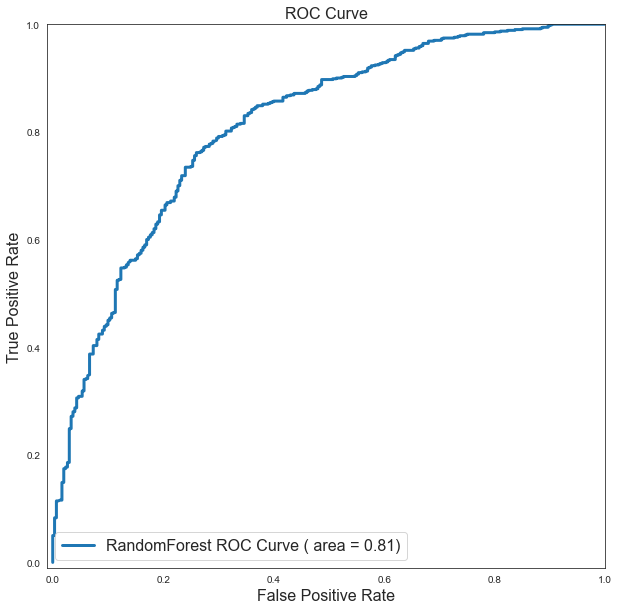

In [66]:
### Random Forest Classifier ###

clf = RandomForestClassifier(random_state = 0).fit(X_train_scaled, y_train)

grid_values = {'n_estimators' : [10, 20, 30, 40, 50], 'max_depth' : [2, 3, 4, 5], 'min_samples_split' : [5, 10, 15, 20]}
grid_clf = GridSearchCV(clf, param_grid = grid_values, cv = 5, scoring = 'precision')
grid_clf.fit(X_train_scaled, y_train)
print('Grid Search best parameter : {0}'.format(grid_clf.best_params_))

clf = RandomForestClassifier(n_estimators = grid_clf.best_params_['n_estimators'], max_depth = grid_clf.best_params_['max_depth'], min_samples_split = grid_clf.best_params_['min_samples_split'], random_state = 0).fit(X_train_scaled, y_train)
               
y_predict = clf.predict(X_test_scaled)
y_score_clf = clf.predict_proba(X_test_scaled)[:,1]

print('\n')
print('Acccuracy of Random Forest classifier on training set', clf.score(X_train_scaled, y_train))
print('Accuracy of Random Forest classifier on test set', clf.score(X_test_scaled, y_test))
print('Precision', precision_score(y_test, y_predict))
print('Recall', recall_score(y_test, y_predict))
print('F1-score', f1_score(y_test, y_predict))

fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)
    
plt.figure(figsize = (10,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr_clf, tpr_clf, lw = 3, label = 'RandomForest ROC Curve ( area = {:.2f})'.format(roc_auc_clf))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC Curve', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()

Grid Search best parameter : {'learning_rate': 1.0, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 10}


Acccuracy of Gradient Boosting classifier on training set 0.906
Accuracy of Gradient Boosting classifier on test set 0.759
Precision 0.8015768725361366
Recall 0.8714285714285714
F1-score 0.8350444900752909


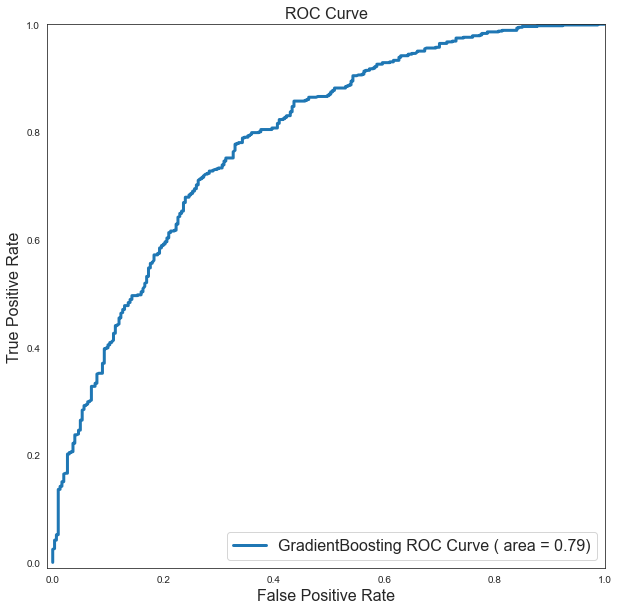

In [67]:
### Gradient Boosting Classifier ###

clf = GradientBoostingClassifier(random_state = 0).fit(X_train_scaled, y_train)

grid_values = {'n_estimators' : [10, 20, 30, 40, 50], 'learning_rate' : [0.01, 0.1, 1.0], 'max_depth' : [2, 3, 4, 5], 'min_samples_split' : [5, 10, 15, 20]}
grid_clf = GridSearchCV(clf, param_grid = grid_values, cv = 5, scoring = 'precision')
grid_clf.fit(X_train_scaled, y_train)
print('Grid Search best parameter : {0}'.format(grid_clf.best_params_))

clf = GradientBoostingClassifier(n_estimators = grid_clf.best_params_['n_estimators'], learning_rate = grid_clf.best_params_['learning_rate'], max_depth = grid_clf.best_params_['max_depth'], min_samples_split = grid_clf.best_params_['min_samples_split'], random_state = 0).fit(X_train_scaled, y_train)

y_predict = clf.predict(X_test_scaled)
y_score_clf = clf.predict_proba(X_test_scaled)[:,1]


print('\n')
print('Acccuracy of Gradient Boosting classifier on training set', clf.score(X_train_scaled, y_train))
print('Accuracy of Gradient Boosting classifier on test set', clf.score(X_test_scaled, y_test))
print('Precision', precision_score(y_test, y_predict))
print('Recall', recall_score(y_test, y_predict))
print('F1-score', f1_score(y_test, y_predict))

fpr_clf, tpr_clf, _ = roc_curve(y_test, y_score_clf)
roc_auc_clf = auc(fpr_clf, tpr_clf)
    
plt.figure(figsize = (10,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr_clf, tpr_clf, lw = 3, label = 'GradientBoosting ROC Curve ( area = {:.2f})'.format(roc_auc_clf))
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC Curve', fontsize = 16)
plt.legend(fontsize = 16)
plt.show()       